In [1]:
#Importando librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
#Abriendo mi archivo de datos
dat=open("/Users/karytzamontiel/Documents/Maestria UNAM/Machine Learning/Perceptron/datos.txt")
df=pd.read_csv(dat,sep="\s+")
df.columns =["X1","X1","X2", "X2", "Valor"]
print(df)

     X1    X1    X2    X2  Valor
0  2.10  3.12  8.21  9.23      1
1  1.95  3.01  8.00  9.67      1
2  2.04  2.99  8.03  9.00     -1
3  2.21  2.98  8.50  8.99      1
4  2.12  3.00  8.34  9.50      1
5  2.18  3.32  8.98  9.79     -1
6  2.15  3.02  8.04  9.73      1
7  2.45  3.06  8.29  9.02      1
8  2.34  3.39  8.07  9.45      1
9  2.51  3.21  8.42  9.08     -1


In [3]:
intf = df.iloc[0:6]
print(intf)

     X1    X1    X2    X2  Valor
0  2.10  3.12  8.21  9.23      1
1  1.95  3.01  8.00  9.67      1
2  2.04  2.99  8.03  9.00     -1
3  2.21  2.98  8.50  8.99      1
4  2.12  3.00  8.34  9.50      1
5  2.18  3.32  8.98  9.79     -1


In [4]:
#Convirtiendo cada columna del dataframe en array
x1=np.array (intf["X1"])
x2=np.array (intf["X2"])
valor=np.array(intf["Valor"]) 
print(x1)
print(x2)
print(valor)

[[2.1  3.12]
 [1.95 3.01]
 [2.04 2.99]
 [2.21 2.98]
 [2.12 3.  ]
 [2.18 3.32]]
[[8.21 9.23]
 [8.   9.67]
 [8.03 9.  ]
 [8.5  8.99]
 [8.34 9.5 ]
 [8.98 9.79]]
[ 1  1 -1  1  1 -1]


In [5]:
#normalizando datos
normalized_x1 = x1 / np.linalg.norm(x1)
normalized_x2 = x2 / np.linalg.norm(x2)
#normalized_valor = valor / np.linalg.norm(valor)


print(normalized_x1)
print(normalized_x2)
#print(normalized_valor)


[[0.23030747 0.34217109]
 [0.21385693 0.33010737]
 [0.22372725 0.32791396]
 [0.24237119 0.32681726]
 [0.23250087 0.32901067]
 [0.23908108 0.36410514]]
[[0.26707881 0.30026034]
 [0.26024732 0.31457395]
 [0.26122324 0.29277823]
 [0.27651277 0.29245292]
 [0.27130783 0.30904369]
 [0.29212761 0.31847765]]


In [6]:
# Combina los datos y las etiquetas en una lista
data = list(zip(normalized_x1, normalized_x2))

# Mezcla los datos de forma aleatoria
random.shuffle(data)

# Separa los datos
#ahora "normalized_x1_shuffled" son los datos seleccionados de manera aleatoria para los datos de x1
#ahora "normalized_x2_shuffled" son los datos seleccionados de manera aleatoria para los datos de x2
    #con estos nuevos datos se entrenará el perceptron
normalized_x1_shuffled, normalized_x2_shuffled = zip(*data)

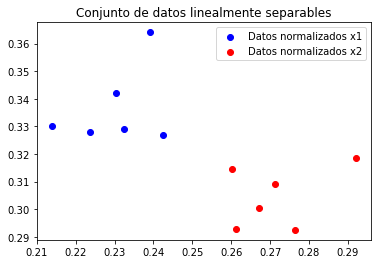

In [7]:
fig, ax = plt.subplots()

#scatter grafica un diagrama de puntos

plt.scatter(normalized_x1[:, 0], normalized_x1[:,1], color='blue', label="Datos normalizados x1")
            #,x1[:,1], color='blue', label="Datos x1") 
plt.scatter(normalized_x2[:,0], normalized_x2[:,1], color='red', label="Datos normalizados x2")
            #,x2[:,1], color='red', label="Datos x2")
plt.title('Conjunto de datos linealmente separables')
plt.legend()
plt.show()

In [8]:
#Definimos los pesos en cero

pesos = [0.00, 0.00]

In [9]:
#Definimos el bias igual a cero

bias = 0

In [10]:
#Definimos la función escalón:
    #regresa 1 si la entrada es mayor o igual a 0
    #regresa 0 en cualquier otro caso

def activacion_fn(x):
    return 1 if x >= 0 else 0

In [11]:
#Definimos la función que toma los datos, los pesos, el bias y utilizando la función de activación anteriormente
#definida, para dar una predicción de que tipo de dato es.

def perceptron(X, pesos, bias):
    suma = bias 
    for i in range(len(pesos)):
        suma += X[i] * pesos[i] #Aquí se calcula el producto de cada dato por el peso y se suma el bias
    return activacion_fn(suma) #La función de activación determinará el tipo de dato
                                #segun el valor de la variable "suma". Si "suma" es mayor o igual a cero, 
                                #la función de activación devolverá 1. De lo contrario, va a devolver 0, 
                                #lo que significa que pertenece a una clase negativa o -1.
    

In [13]:
#Definimos las épocas
epocas = 1000

#Definimos la magnitud con la que ajustará los pesos
learning_rate = 0.6

In [14]:
#Iterando sobre los datos en cada una de las epocas para actualizar los pesos.
for _ in range(epocas):
   for i in range(len(normalized_x1_shuffled)):
        # Predicción y cálculo del error para el primer conjunto de datos, de aquí se ajustan los pesos segun el error
        #Se hacen predicciones para cada uno de los conjuntos de datos
        prediccion1 = perceptron(normalized_x1_shuffled[i], pesos, bias)
        error1 = valor[i] - prediccion1    #Se calcula el error comparando el verdadero valor del dato con 
                                            #la predicción
        prediccion2 = perceptron(normalized_x2_shuffled[i], pesos, bias)
        error2 = valor[i] - prediccion2
        
        #Aquí se actualizan los pesos y el bias sumandole el producto de learning_rate con el error calculado
        #para cada uno de los datos
        for j in range(len(pesos)):
            
              #  for k in range(len(learning_rate)):
                    pesos[j] += learning_rate * (error1 * normalized_x1_shuffled[i][j] + error2 * normalized_x2_shuffled[i][j])
                    bias += learning_rate * (error1 + error2) #actualizando el bias

In [15]:
#Resultado de los pesos y el bias
print("Pesos finales:", pesos)
print("b:", bias)
#print("learning_rate", learning_rate)

Pesos finales: [-9.477477427234017, -51.531357246981145]
b: 14.399999999996774


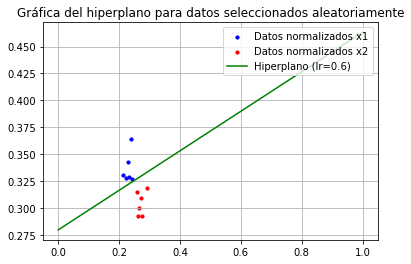

In [20]:
#Pesos y bias resultantes del entrenamiento del perceptrón
pesos = [-9.477477427234017, -51.531357246981145]  # Los pesos pueden variar dependiendo del entrenamiento
bias = -14.399999999996774 # El sesgo puede variar dependiendo del entrenamiento

#Función de predicción
def perceptron(X):
    z = bias + np.dot(X, pesos)
    return np.where(z >= 0, 1, 0)

# Graficar los datos 
plt.scatter(normalized_x1[:, 0], normalized_x1[:, 1], color='blue', s=10, label="Datos normalizados x1")
plt.scatter(normalized_x2[:, 0], normalized_x2[:, 1], color='red', s=10, label="Datos normalizados x2")

# Graficar el hiperplano 
x_values = np.linspace(0, 1, 100)
valor_values = (bias + pesos[0] * x_values) / pesos[1]
plt.plot(x_values, valor_values, color='green', linestyle='-', label='Hiperplano (lr=0.6)')

# Iterar sobre las tasas de aprendizaje para graficar las diferentes rectas
#x_values = np.linspace(0, 1, 100)
#for m in learning_rate:
#    valor_values = (bias + pesos[0] * x_values) / pesos[1] * m
#    plt.plot(x_values, valor_values, linestyle='-', label=f'Hiperplano (lr={m})') #lr=learning_rate

# Añadir etiquetas
plt.title('Gráfica del hiperplano para datos seleccionados aleatoriamente')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [21]:
#Imprimir la ecuación del hiperplano
#print("Ecuación del hiperplano:")
#print(f"{-pesos[0]}*x1 + {-pesos[1]}*x2 + ({-bias}) = 0")

La ecuacion de la recta del hiperplano es
x1w1 + x2w2 + b = 0

Para obtener la ecuacion de la recta despejamos un dato para dejarlo en términos de lo otro:
x2 = -x1w1/w2 - b/w2

Entonces la ecuacion de la recta es y = mx + a

De aquí los coeficientes m y a:
    m = w1/w2
    a = b/w2

In [22]:
# Calcular los coeficientes de la ecuación de la recta
#m = pesos[0] / pesos[1]
#a = bias / pesos[1]

# Imprimir la ecuación de la recta
#print("Ecuación de la recta:")
#print(f"y = {m} * x + {a}")

Comparando con mi ecuación de la recta que calculé analíticamente:
  y = (6/7)x + 39/350
  
Donde m = 6/7 ~ 0.8571 y b = 39/350 ~ 0.1114   